## 다양한 피처선정 방법으로 피처 선택하기
- 상관관계 높았던 Top 10개 기준으로 차원 축소(Wrapper 방식) 진행

## 차원축소 기법(Feature Selection): Wrapper
- 상관관계에서 0.2 이상인 Feature에서 Feature selection 진행
- 전진 선택(Forward selection)
- 후진 제거(Backward elimination)
- Stepwise selection

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

from sklearn.metrics import accuracy_score

In [22]:
# 파일 경로 설정
file_path = "data.csv"

# CSV 파일을 DataFrame으로 불러오기
data = pd.read_csv(file_path)

In [27]:
# 독립변수 종속변수 정리
X = data[[' Net Income to Total Assets', ' ROA(A) before interest and % after tax', 
          ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', 
          ' Net worth/Assets', ' Debt ratio %', ' Persistent EPS in the Last Four Seasons', 
          ' Retained Earnings to Total Assets', ' Net profit before tax/Paid-in capital', ' Per Share Net profit before tax (Yuan ¥)']]

y = data['Bankrupt?']

# 훈련 데이터셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)


sfs_forward 선택된 특성
(' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Net worth/Assets', ' Persistent EPS in the Last Four Seasons', ' Net profit before tax/Paid-in capital', ' Per Share Net profit before tax (Yuan ¥)')
sfs_backward 선택된 특성
(' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Net worth/Assets', ' Debt ratio %', ' Persistent EPS in the Last Four Seasons', ' Retained Earnings to Total Assets', ' Net profit before tax/Paid-in capital', ' Per Share Net profit before tax (Yuan ¥)')
sfs_stepwise 선택된 특성
(' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Net worth/Assets', ' Persistent EPS in the Last Four Seasons', ' Net prof

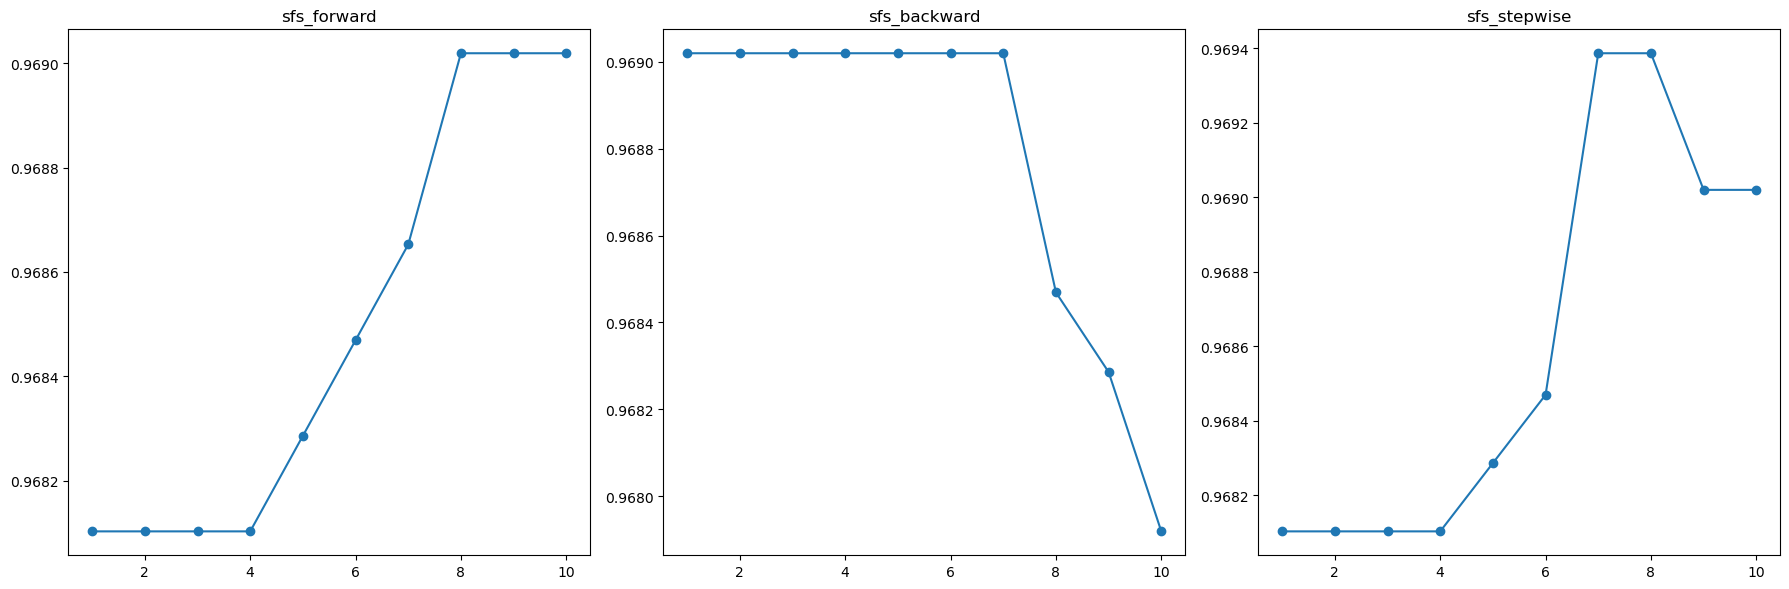

In [28]:
# 로지스틱회귀모델 가지고오기
model = LogisticRegression(max_iter=200)

#SFS
sfs_forward=SFS(model, k_features= 'best', forward=True, floating=False, scoring='accuracy', cv=3)
sfs_backward=SFS(model, k_features= 'best', forward= False, floating=False, scoring='accuracy', cv=3)
sfs_stepwise=SFS(model, k_features= 'best', forward= True, floating=True, scoring='accuracy', cv=3)

sfs_forward =sfs_forward.fit(X_train, y_train)
sfs_backward =sfs_backward.fit(X_train, y_train)
sfs_stepwise =sfs_stepwise.fit(X_train, y_train)

print('sfs_forward 선택된 특성')
print(sfs_forward.k_feature_names_)


print('sfs_backward 선택된 특성')
print(sfs_backward.k_feature_names_)


print('sfs_stepwise 선택된 특성')
print(sfs_stepwise.k_feature_names_)

fig, ax = plt.subplots(1,3, figsize=(18,6))
ax[0].plot(range(1, len(sfs_forward.subsets_)+1),[sfs_forward.subsets_[i]['avg_score'] for i in sfs_forward.subsets_], marker='o')
ax[0].set_title('sfs_forward')

ax[1].plot(range(1, len(sfs_backward.subsets_)+1),[sfs_backward.subsets_[i]['avg_score'] for i in sfs_backward.subsets_], marker='o')
ax[1].set_title('sfs_backward')

ax[2].plot(range(1, len(sfs_stepwise.subsets_)+1),[sfs_stepwise.subsets_[i]['avg_score'] for i in sfs_stepwise.subsets_], marker='o')
ax[2].set_title('sfs_stepwise')

plt.tight_layout()
plt.show()

## RFE, RFECV
<b> RFE </b> : 반복적으로 훈련시키고, 가장 중요도가 낮은 특성을 하나씩 제거하는 방식, 몇 개 제거할지 등을 지정할 수 있다.


- RFE

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# RandomForest 모델
model_rf = RandomForestClassifier(n_estimators=100, random_state=111)

# RFE 모델 생성 및 학습
selector_rf = RFE(estimator=model_rf, n_features_to_select=15)
selector_rf = selector_rf.fit(X, y)

# 선택된 특성
selected_features_rf = [X.columns[i] for i in range(len(selector_rf.support_)) if selector_rf.support_[i]]
print('RandomForest RFE 선택된 특성:', selected_features_rf)

RandomForest RFE 선택된 특성: [' Non-industry income and expenditure/revenue', ' Interest-bearing debt interest rate', ' Net Value Per Share (B)', ' Persistent EPS in the Last Four Seasons', ' Net Value Growth Rate', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Borrowing dependency', ' Net profit before tax/Paid-in capital', ' Accounts Receivable Turnover', ' Cash/Total Assets', ' Working Capital/Equity', " Net Income to Stockholder's Equity", ' Degree of Financial Leverage (DFL)']


- RFECV

<b> RFECV </b>: 확장된 버전 -> 교차검증 통해 최적의 특성 수를 자동으로 결정, 반복에서 특성 제거하면서 교차검증으로 수행하여 모델 평가 -> 특성 수 찾기

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

In [17]:
model= RandomForestClassifier()
cv= StratifiedKFold(3)

In [18]:
#RFECV 모델 만들기
selector =RFECV(estimator=model, step=1, cv=cv)
selector=selector.fit(X,y)

In [19]:
# 최적의 특성 수 , 선택된 특성 출력

print('최적의 피처 수 ', selector.n_features_)
print('최적의 피처 수 ', selector.support_)

최적의 피처 수  51
최적의 피처 수  [ True  True  True  True False False  True  True  True  True  True False
 False  True False  True  True  True  True False False False  True False
 False False False False False  True  True False False  True  True  True
  True  True False  True False False  True False False  True  True  True
  True False  True  True  True  True False False  True False  True False
 False  True False False  True False False  True  True False  True  True
  True False  True False False False False False  True False False False
 False  True  True  True False  True  True  True  True False  True]


In [20]:
# 선택된 Feature 이름 출력
selected_features = [name for name, support in zip(data, selector.support_) if support]

print('선택된 Feature:', selected_features)

선택된 Feature: ['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Cash flow rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Operating Profit Per Share (Yuan ¥)', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Long-term fund suitability ratio (A)', ' Operating profit/Paid-in capital', ' Total Asset Turnover', ' Accounts Receivable Turnover', ' Average Collection Days', ' Inventory Turnover Rate (times)', ' Net Worth Turnover Rate (times)', ' Revenue per person', ' Operating profit per person', ' Allocation rate per per

## 중간 정리
- <b> 상관관계로 선택된 Feature:  </b>
'Bankrupt?', ' Net Income to Total Assets', ' ROA(A) before interest and % after tax',
' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Net worth/Assets',
' Debt ratio %', ' Persistent EPS in the Last Four Seasons', ' Retained Earnings to Total Assets', ' Net profit before tax/Paid-in capital'
,' Per Share Net profit before tax (Yuan ¥)'

- <b> sfs_forward 선택된 특성: </b>
(' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Net worth/Assets', ' Persistent EPS in the Last Four Seasons', ' Net profit before tax/Paid-in capital', ' Per Share Net profit before tax (Yuan ¥)')

- <b> sfs_backward 선택된 특성: </b>
(' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Net worth/Assets', ' Debt ratio %', ' Persistent EPS in the Last Four Seasons', ' Retained Earnings to Total Assets', ' Net profit before tax/Paid-in capital', ' Per Share Net profit before tax (Yuan ¥)')

- <b> sfs_stepwise 선택된 특성: </b>
(' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Net worth/Assets', ' Persistent EPS in the Last Four Seasons', ' Net profit before tax/Paid-in capital', ' Per Share Net profit before tax (Yuan ¥)')

- <b> RFE로 선택된 Feature: </b>
' Non-industry income and expenditure/revenue', ' Interest-bearing debt interest rate', ' Net Value Per Share (B)', ' Persistent EPS in the Last Four Seasons', ' Net Value Growth Rate', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Borrowing dependency', ' Net profit before tax/Paid-in capital', ' Accounts Receivable Turnover', ' Cash/Total Assets', ' Working Capital/Equity', " Net Income to Stockholder's Equity", ' Degree of Financial Leverage (DFL)'
    
- <b> RFECV 로 선택된 Feature: </b>
'Bankrupt?', ' ROA(A) before interest and % after tax', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Cash flow rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Operating Profit Per Share (Yuan ¥)', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Current Ratio', ' Quick Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Long-term fund suitability ratio (A)', ' Operating profit/Paid-in capital', ' Total Asset Turnover', ' Accounts Receivable Turnover', ' Average Collection Days', ' Inventory Turnover Rate (times)', ' Net Worth Turnover Rate (times)', ' Revenue per person', ' Operating profit per person', ' Allocation rate per person', ' Current Assets/Total Assets', ' Cash/Total Assets', ' Quick Assets/Current Liability', ' Operating Funds to Liability', ' Current Liabilities/Liability', ' Retained Earnings to Total Assets', ' Liability-Assets Flag', ' Net Income to Total Assets', ' Total assets to GNP price', ' Gross Profit to Sales', " Net Income to Stockholder's Equity", ' Liability to Equity', ' Degree of Financial Leverage (DFL)', ' Net Income Flag'


In [37]:
# 상관관계로 선택된 Feature

correlation_features = {'Bankrupt?', 'Net Income to Total Assets', 'ROA(A) before interest and % after tax', 
                        'ROA(B) before interest and depreciation after tax', 'ROA(C) before interest and depreciation before interest', 
                        'Net worth/Assets', 'Debt ratio %', 'Persistent EPS in the Last Four Seasons', 
                        'Retained Earnings to Total Assets', 'Net profit before tax/Paid-in capital', ' Per Share Net profit before tax (Yuan ¥)'}

forward_features = {' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Net worth/Assets', ' Persistent EPS in the Last Four Seasons', ' Net profit before tax/Paid-in capital', ' Per Share Net profit before tax (Yuan ¥)'}

backward_features = {' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Net worth/Assets', ' Debt ratio %', ' Persistent EPS in the Last Four Seasons', ' Retained Earnings to Total Assets', ' Net profit before tax/Paid-in capital', ' Per Share Net profit before tax (Yuan ¥)'}

stepwise_features = {' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Net worth/Assets', ' Persistent EPS in the Last Four Seasons', ' Net profit before tax/Paid-in capital', ' Per Share Net profit before tax (Yuan ¥)'}


# RFE로 선택된 Feature
rfe_features = {' Non-industry income and expenditure/revenue', ' Interest-bearing debt interest rate', ' Net Value Per Share (B)',
                ' Persistent EPS in the Last Four Seasons', ' Net Value Growth Rate', ' Quick Ratio', ' Interest Expense Ratio',
                ' Total debt/Total net worth', ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
                ' Accounts Receivable Turnover', ' Cash/Total Assets', ' Working Capital/Equity', " Net Income to Stockholder's Equity",
                ' Degree of Financial Leverage (DFL)'}

# RFECV로 선택된 Feature
rfecv_features = {'Bankrupt?', ' ROA(A) before interest and % after tax', ' After-tax net Interest Rate',
                  ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Cash flow rate',
                  ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)',
                  ' Operating Profit Per Share (Yuan ¥)', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Current Ratio',
                  ' Quick Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Long-term fund suitability ratio (A)',
                  ' Operating profit/Paid-in capital', ' Total Asset Turnover', ' Accounts Receivable Turnover', ' Average Collection Days',
                  ' Inventory Turnover Rate (times)', ' Net Worth Turnover Rate (times)', ' Revenue per person', ' Operating profit per person',
                  ' Allocation rate per person', ' Current Assets/Total Assets', ' Cash/Total Assets', ' Quick Assets/Current Liability',
                  ' Operating Funds to Liability', ' Current Liabilities/Liability', ' Retained Earnings to Total Assets', ' Liability-Assets Flag',
                  ' Net Income to Total Assets', ' Total assets to GNP price', ' Gross Profit to Sales', " Net Income to Stockholder's Equity",
                  ' Liability to Equity', ' Degree of Financial Leverage (DFL)', ' Net Income Flag'}


# 중복된 특성을 담을 리스트
unique_overlaps = []

# 중복된 특성 찾기
for (key1, key2), overlap in overlaps.items():
    # 중복된 특성을 추가하기 전에 이미 있는지 확인
    for feature in overlap:
        if feature not in unique_overlaps:
            unique_overlaps.append(feature)

# 중복된 특성 출력
print("중복된 특성:")
for overlap in unique_overlaps:
    print(overlap)

중복된 특성:
 Per Share Net profit before tax (Yuan ¥)
Bankrupt?
 ROA(A) before interest and % after tax
 Net Income to Total Assets
 ROA(C) before interest and depreciation before interest
 Net worth/Assets
 ROA(B) before interest and depreciation after tax
 Persistent EPS in the Last Four Seasons
 Net profit before tax/Paid-in capital
 Retained Earnings to Total Assets
 Debt ratio %
 Non-industry income and expenditure/revenue
 Net Income to Stockholder's Equity
 Net Value Growth Rate
 Accounts Receivable Turnover
 Quick Ratio
 Cash/Total Assets
 Total debt/Total net worth
 Net Value Per Share (B)
 Degree of Financial Leverage (DFL)


- <b> 2개 이상 겹치는 Feature: </b>
{
    ' Per Share Net profit before tax (Yuan ¥)',
    'Bankrupt?',
    ' ROA(A) before interest and % after tax',
    ' Net Income to Total Assets',
    ' ROA(C) before interest and depreciation before interest',
    ' Net worth/Assets',
    ' ROA(B) before interest and depreciation after tax',
    ' Persistent EPS in the Last Four Seasons',
    ' Net profit before tax/Paid-in capital',
    ' Retained Earnings to Total Assets',
    ' Debt ratio %',
    ' Non-industry income and expenditure/revenue',
    ' Net Income to Stockholder\'s Equity',
    ' Net Value Growth Rate',
    ' Accounts Receivable Turnover',
    ' Quick Ratio',
    ' Cash/Total Assets',
    ' Total debt/Total net worth',
    ' Net Value Per Share (B)',
    ' Degree of Financial Leverage (DFL)'
}
